In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from sklearn import preprocessing
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Business Understanding 

The goal of this data analysis is to predict if it will rain the following day in Australia based off a set of weather readings from the current day. Tomorrow's weather readings cannot be used in the prediction of if it will rain tomorrow.

# Data Understanding

The data understanding phase of CRISP-DM involves taking a closer look at the data available for mining. This step is critical in avoiding unexpected problems during the next phase--data preparation--which is typically the longest part of a project.

Data understanding involves accessing the data and exploring it using tables and graphics that can be organized in IBM® SPSS® Modeler using the CRISP-DM project tool. This enables you to determine the quality of the data and describe the results of these steps in the project documentation.

In [2]:
###Read In Data
df = pd.read_csv('AustraliaWeather.csv')

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Oversampling

Text(0.5, 1.0, 'Rain Tomorrow?')

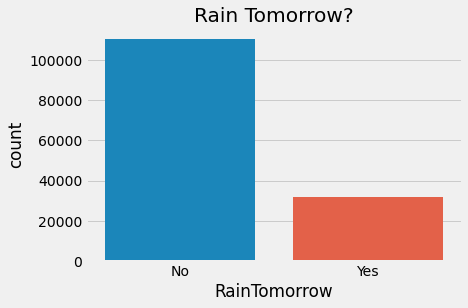

In [5]:
#oversampling
#hist = df['RainTomorrow'].hist(bins=3)
plt.style.use('fivethirtyeight') 

willrain = sns.countplot(x = "RainTomorrow", data = df)
willrain.set_title("Rain Tomorrow?")

In [6]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

### Missing Values 

In [7]:
df.isnull().mean().sort_values(ascending=False)

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
RainToday        0.022419
Rainfall         0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
WindSpeed9am     0.012148
Temp9am          0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

#### Separating dataframes into one dataframe for categories and one dataframe for numeric values

In [8]:
df2 = df.copy()
# Assigning binary values
df2['RainTomorrow'] = df2['RainTomorrow'].eq('Yes').mul(1)
df2['RainToday'] = df2['RainToday'].eq('Yes').mul(1)

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
## Separating into a DF for categories and DF for number column types

cat_df = df2[['WindGustDir','WindDir9am','WindDir3pm','Date','Location']]

num_df = df2[['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm','RainToday','RainTomorrow']]

### Correlation of numeric features

<AxesSubplot:>

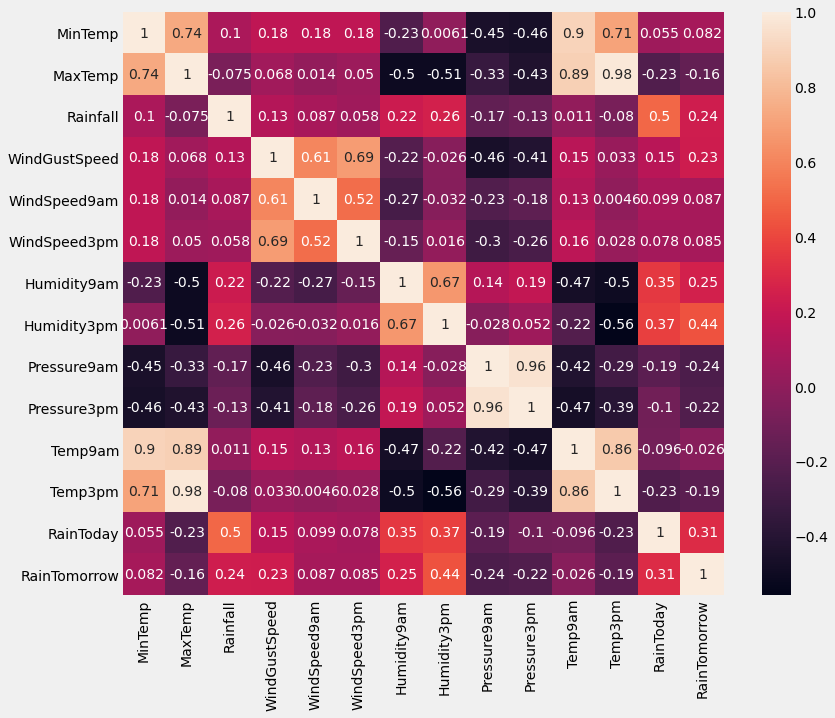

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=True)

In [12]:
# find all correlated columns and add to list
nums = num_df.columns
limit = 0.7
cor_col = []
for n in nums:
    for j in nums:
        if n == j:
            continue
        if abs(num_df[[n,j]].corr()[n][1]) >= limit:
            print(n, j, num_df[[n,j]].corr()[n][1])
            cor_col.append(j)

MinTemp MaxTemp 0.7365548799473723
MinTemp Temp9am 0.9018205621779564
MinTemp Temp3pm 0.7089055392797939
MaxTemp MinTemp 0.7365548799473723
MaxTemp Temp9am 0.887209692750404
MaxTemp Temp3pm 0.9845028310903305
Pressure9am Pressure3pm 0.9613257211174032
Pressure3pm Pressure9am 0.9613257211174032
Temp9am MinTemp 0.9018205621779564
Temp9am MaxTemp 0.887209692750404
Temp9am Temp3pm 0.8605912373433446
Temp3pm MinTemp 0.7089055392797939
Temp3pm MaxTemp 0.9845028310903305
Temp3pm Temp9am 0.8605912373433446


               RainTomorrow
Humidity3pm        0.439929
RainToday          0.305744
Humidity9am        0.253657
Rainfall           0.236461
WindGustSpeed      0.229195
WindSpeed9am       0.087145
WindSpeed3pm       0.085119
MinTemp            0.082455
Temp9am           -0.025685
MaxTemp           -0.157141
Temp3pm           -0.190073
Pressure3pm       -0.223351
Pressure9am       -0.243348


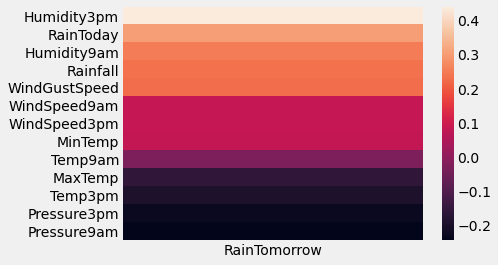

In [13]:
corr = num_df.corr()
rain_corr = corr[['RainTomorrow']].sort_values('RainTomorrow', ascending=False)
x = corr[['RainTomorrow']]
rain_corr = rain_corr.drop('RainTomorrow', axis=0)
sns.heatmap(rain_corr)
print(rain_corr)

In [14]:
num_df = num_df.drop(['Temp3pm','Pressure9am','Temp9am'], axis = 1)

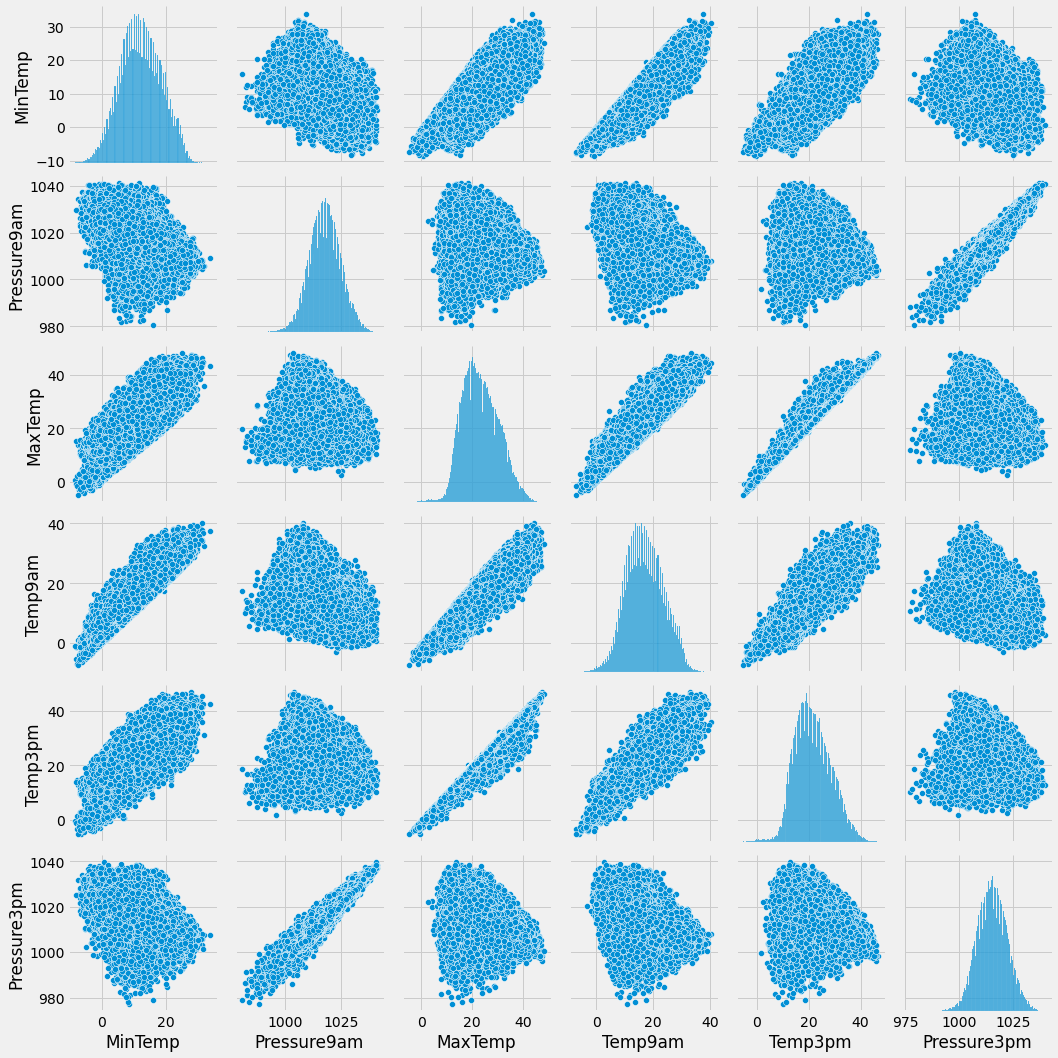

In [15]:
cor_col = list(set(cor_col))
sns.pairplot(df[cor_col], diag_kind='hist', kind='scatter')

# Data Preparation

Drop columns where more than 30% missing values

In [16]:
# The number of null values in Sunshin, Evaporation, Cloud3pm and Cloud 9am is very high so these columns will be dropped
df_dc = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1)

In [17]:
# drop confounding / conflating variables
df_dc = df_dc.drop(['Temp3pm','Pressure9am','Temp9am'], axis = 1)

In [18]:
#formatting date
df_dc['Date']=pd.to_datetime(df_dc['Date'],format='%Y-%m-%d')

In [19]:
## Remaining category NULL values 
cat_df.isnull().mean().sort_values(ascending=False)

WindDir9am     0.072639
WindGustDir    0.070989
WindDir3pm     0.029066
Location       0.000000
Date           0.000000
dtype: float64

#### Replacing NULL values in categories with the most common value for that location

In [20]:
for col in cat_df.columns.values:
    if df_dc[col].isnull().sum() == 0:
        continue
    cat_df[col] = df_dc.groupby(['Location'])[col].apply(lambda x: x.fillna(x.mode().max()))

Remaining NULL values

In [21]:
cat_df.isnull().mean().sort_values(ascending=False)

WindGustDir    0.041792
Location       0.000000
Date           0.000000
WindDir3pm     0.000000
WindDir9am     0.000000
dtype: float64

#### There are still NULL values for WindGustDir. This is because some locations do not have any values for this field. Therefore I am replacing NULL values for WindGustDir with the mode of the complete dataset

In [22]:
cat_df['WindGustDir']=df_dc['WindGustDir'].fillna(df_dc['WindGustDir'].mode().max())

In [23]:
cat_df.isnull().mean().sort_values(ascending=False)

Location       0.0
Date           0.0
WindDir3pm     0.0
WindDir9am     0.0
WindGustDir    0.0
dtype: float64

#### Remaining NULL values for numerical features

In [24]:
num_df.isnull().mean().sort_values(ascending=False)

Pressure3pm      0.103314
WindGustSpeed    0.070555
Humidity3pm      0.030984
Rainfall         0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
RainTomorrow     0.000000
RainToday        0.000000
dtype: float64

In [25]:
for col in num_df.columns.values:
    if num_df[col].isnull().sum() == 0:
        continue
    num_df[col] = df_dc.groupby(['Location'])[col].apply(lambda x: x.fillna(x.mode().max()))

In [26]:
num_df.isnull().mean().sort_values(ascending=False)

Pressure3pm      0.083315
WindGustSpeed    0.041792
RainTomorrow     0.000000
RainToday        0.000000
Humidity3pm      0.000000
Humidity9am      0.000000
WindSpeed3pm     0.000000
WindSpeed9am     0.000000
Rainfall         0.000000
MaxTemp          0.000000
MinTemp          0.000000
dtype: float64

#### Just like in categories, there are some locations that don't have any values whatsoever for features. In this case it is Pressure3pm  and WindGustSpeed. Therefore, just like before these values will be replaces with the mean of all values for that feature, independant of location

In [27]:
num_df['Pressure3pm']=num_df['Pressure3pm'].fillna(df_dc['Pressure3pm'].mean())
#num_df['Pressure9am']=num_df['Pressure9am'].fillna(df_dc['Pressure9am'].mean())
num_df['WindGustSpeed']=num_df['WindGustSpeed'].fillna(df_dc['WindGustSpeed'].mean())

In [28]:
num_df.isnull().mean().sort_values(ascending=False)

RainTomorrow     0.0
RainToday        0.0
Pressure3pm      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
WindSpeed9am     0.0
WindGustSpeed    0.0
Rainfall         0.0
MaxTemp          0.0
MinTemp          0.0
dtype: float64

In [29]:
#merging df's
df_final = pd.merge(num_df, cat_df, left_index=True, right_index=True)

In [30]:
# should I encode Yes & No as 1 and 0?
#df_final.set_index('Date', inplace=True)
df_final

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,WindGustDir,WindDir9am,WindDir3pm,Date,Location
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.1,0,0,W,W,WNW,2008-12-01,Albury
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1007.8,0,0,WNW,NNW,WSW,2008-12-02,Albury
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1008.7,0,0,WSW,W,WSW,2008-12-03,Albury
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1012.8,0,0,NE,SE,E,2008-12-04,Albury
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1006.0,0,0,W,ENE,NW,2008-12-05,Albury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1020.3,0,0,E,SE,ENE,2017-06-21,Uluru
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1019.1,0,0,NNW,SE,N,2017-06-22,Uluru
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1016.8,0,0,N,SE,WNW,2017-06-23,Uluru
145458,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1016.5,0,0,SE,SSE,N,2017-06-24,Uluru


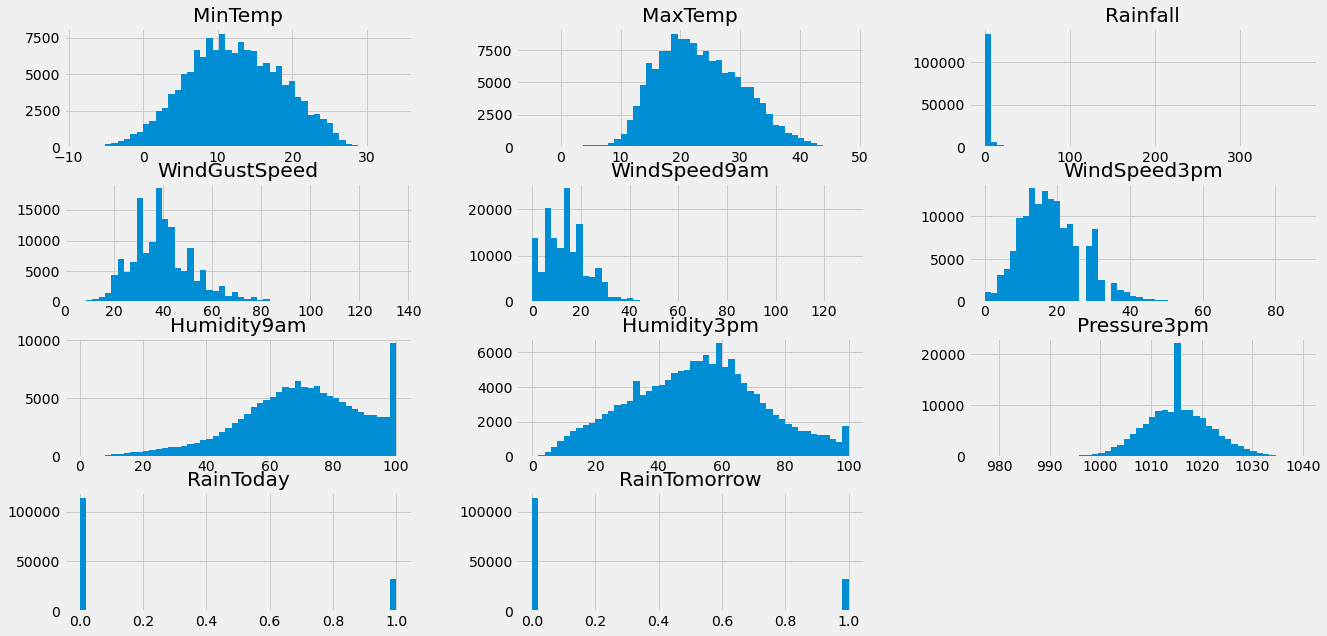

In [31]:
df_final.hist(bins=50, figsize=(20, 10))
plt.show()

### One-hot-encoding categorical variables

In [32]:

df_final.drop(['Date'], axis=1, inplace=True)
df_final.drop(['Location'], axis=1, inplace=True)
# Only want to enced categorical features which are ['WindGustDir','WindDir9am','WindDir3pm']


In [33]:
enc = pd.get_dummies(data=df_final, columns=['WindGustDir','WindDir9am','WindDir3pm'])
enc['RainToday'] = df_final['RainToday'].astype(str)
enc['RainTomorrow'] = df_final['RainTomorrow'].astype(str)

lb = preprocessing.LabelBinarizer()

enc['RainToday'] = lb.fit_transform(enc['RainToday'])
enc['RainTomorrow'] = lb.fit_transform(enc['RainTomorrow'])
enc = enc.dropna()
#ohe.drop('Location', axis=1, inplace=True)
y = enc['RainTomorrow']
X = enc.drop(['RainTomorrow'], axis=1)
enc.drop(['RainTomorrow'], axis=1, inplace=True)

# Modeling

### Split Data

In [34]:
enc.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm',
       'RainToday', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE',
       'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE',
       'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW',
       'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'Win

In [35]:
# X = enc.iloc[:, :-1]
# y = enc.iloc[:, -1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### KNN

In [36]:
# Finding the most optimal values for Manhattan distance 
# knn_1_ar = []
# #neighbours_ar = []
# for i in range(1, 22, 2):
#     knn = KNeighborsClassifier(n_neighbors=i, p=1, 
#                                metric='minkowski')
#     knn.fit(X_train, y_train)
    
#     knn_1_ar.append(i)
#     knn_1_ar.append(knn.score(X_test, y_test))
    
# print(knn_1_ar)
#knn 15 = 0.8454328796003483

In [37]:
## Finding the most optimal values for Euclidean metric
# knn_2_ar = []
# for i in range(1, 22, 2):
#     knn = KNeighborsClassifier(n_neighbors=i, p=2, 
#                                metric='minkowski')
#     knn.fit(X_train, y_train)
    
#     knn_2_ar.append(i)
#     knn_2_ar.append(knn.score(X_test, y_test))
    
# print(knn_2_ar)

##

In [38]:
knn = KNeighborsClassifier(n_neighbors=15, p=1, 
                           metric='minkowski')
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91     34098
           1       0.73      0.46      0.57      9540

    accuracy                           0.85     43638
   macro avg       0.80      0.71      0.74     43638
weighted avg       0.83      0.85      0.83     43638



In [39]:
knn_head = knn.predict(X_test)
print(f"""
accuracy_score: {accuracy_score(knn_head, y_test)}
roc_auc_score: {roc_auc_score(knn_head, y_test)}
""")


accuracy_score: 0.8454328796003483
roc_auc_score: 0.7977805965161909



## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [41]:
lr_head = LR.predict(X_test)
print(f"""
accuracy_score: {accuracy_score(lr_head, y_test)}
roc_auc_score: {roc_auc_score(lr_head, y_test)}
""")


accuracy_score: 0.8375956734955773
roc_auc_score: 0.7811233952710226



In [42]:
# Import machine learning algorithmn and evaluation reports

# Instantiatie the classifier 
lr = LogisticRegression(solver="liblinear", random_state=0) # liblinear works better for larger datasets

# Fit to the training data
lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = lr.predict(X_test)

# Print classification report on test dataset
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     34098
           1       0.71      0.44      0.55      9540

    accuracy                           0.84     43638
   macro avg       0.78      0.70      0.72     43638
weighted avg       0.83      0.84      0.82     43638



### Balancing

In [43]:
# Balanced logistic regression
lr_b = LogisticRegression(class_weight = "balanced", solver="liblinear", random_state=0)

#fit to the training data
lr_b.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr_b = lr_b.predict(X_test)

# Print classification report
print(classification_report(y_test,y_pred_lr_b))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85     34098
           1       0.49      0.75      0.59      9540

    accuracy                           0.78     43638
   macro avg       0.70      0.76      0.72     43638
weighted avg       0.82      0.78      0.79     43638



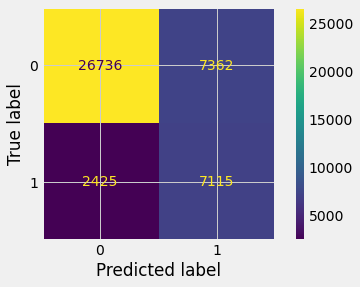

In [44]:

plot_confusion_matrix(lr_b, X_test, y_test)  

## Random Forest

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34098
           1       1.00      0.94      0.97      9540

    accuracy                           0.99     43638
   macro avg       0.99      0.97      0.98     43638
weighted avg       0.99      0.99      0.99     43638



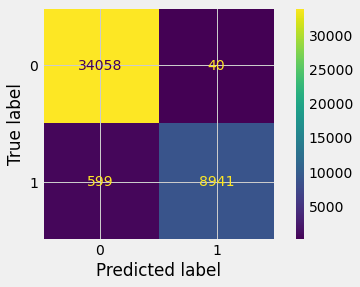

In [45]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)
y_pred_rf = clf.predict(X_test)
print(classification_report(y_test,y_pred_rf))
plot_confusion_matrix(clf, X_test, y_test)  

In [46]:
importance = clf.feature_importances_
dictionary = dict(zip(enc.columns, importance))
dictionary

{'MinTemp': 0.0740313319516365,
 'MaxTemp': 0.07709379443650487,
 'Rainfall': 0.07792256450740712,
 'WindGustSpeed': 0.07165734599042224,
 'WindSpeed9am': 0.04757056584209452,
 'WindSpeed3pm': 0.050142756273113875,
 'Humidity9am': 0.08503318173839315,
 'Humidity3pm': 0.1899920287453705,
 'Pressure3pm': 0.09373910592108554,
 'RainToday': 0.02367004668802407,
 'WindGustDir_E': 0.0035377447245318757,
 'WindGustDir_ENE': 0.0033234070315758964,
 'WindGustDir_ESE': 0.0033854266827626767,
 'WindGustDir_N': 0.004697843228611875,
 'WindGustDir_NE': 0.0038095815462720665,
 'WindGustDir_NNE': 0.0037590599192417057,
 'WindGustDir_NNW': 0.0041566135408858135,
 'WindGustDir_NW': 0.004628279867151348,
 'WindGustDir_S': 0.004374867693841441,
 'WindGustDir_SE': 0.004148664751790067,
 'WindGustDir_SSE': 0.003965102472662327,
 'WindGustDir_SSW': 0.004476027742103041,
 'WindGustDir_SW': 0.004492993861840937,
 'WindGustDir_W': 0.006357498343867059,
 'WindGustDir_WNW': 0.004719856065961354,
 'WindGustDir_WS

In [47]:
# Find Most Optimal RFC
# from sklearn.metrics import accuracy_score
# scores =[]
# n = 50

# for k in range(1, n):
#     regressor = RandomForestClassifier(n_estimators=k, random_state=0)
#     regressor.fit(X_train, y_train)
#     y_pred = regressor.predict(X_test)
#     scores.append(metrics.r2_score(y_test,y_pred))
#     print(k)

# import matplotlib.pyplot as plt
# %matplotlib inline

# # plot the relationship between K and testing accuracy
# # plt.plot(x_axis, y_axis)
# plt.plot(range(1, n), scores)
# plt.xlabel('Value of n_estimators for Random Forest Regressor')
# plt.ylabel('Testing Accuracy')